In [1]:
import matplotlib.pyplot as plt
import plot_utils as u
import csv
from pathlib import Path
import numpy as np

In [2]:
result_dir = Path('Controller_Simulations/IFT/iterative_feedback_tuning_PI_Controller-20221013104417/')

In [3]:
with open(result_dir / 'controller_iteration_values.csv', 'r') as f:
    iteration_history = np.array([float(r) for r in f])

with open(result_dir / 'controller_reference_values.csv', 'r') as f:
    reference_history = np.array([float(r) for r in f])

with open(result_dir / 'controller_error_values.csv', 'r') as f:
    error_history = np.array([float(r) for r in f])

with open(result_dir / 'controller_beta_values.csv', 'r') as f:
    beta_history = np.array([float(r) for r in f])

In [4]:
shifted_reference_history = np.copy(reference_history)
shifted_reference_history[iteration_history != 1] = 0
edges = iter(np.where(np.diff(1 * (iteration_history == 1)))[0])
for s in edges:
    e = next(edges)
    length = e - s
    if s < length:
        tmp = np.delete(shifted_reference_history, np.s_[:s])
        shifted_reference_history = np.insert(tmp, length + 1, np.zeros(s))
    else:
        tmp = np.delete(shifted_reference_history, np.s_[s-length:s])
        shifted_reference_history = np.insert(tmp, e - length + 1, np.zeros(length))

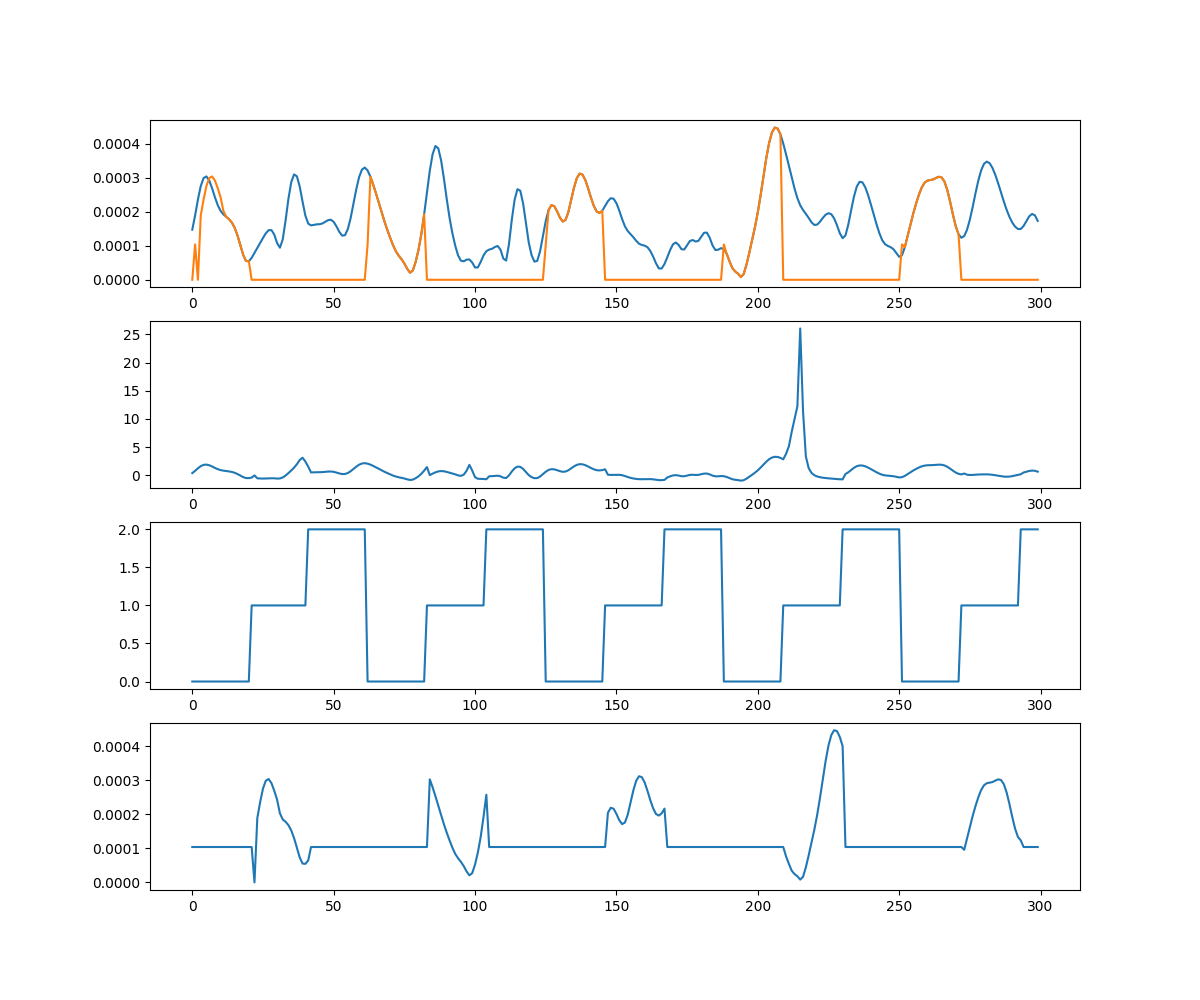

In [5]:
%matplotlib widget
fig, ax = plt.subplots(4, 1, figsize=(12, 10))
ax[0].plot(beta_history)
ax[1].plot(error_history)
ax[2].plot(iteration_history)
ax[3].plot(reference_history)
ax[0].plot(shifted_reference_history)
